# Essential tools

The following tools are your bread and butter. We show some important functionalities here. 

## Numpy

For array manipulations, linear algebra, interpolation and basic statistics.

In [2]:
import numpy as np

### Define arrays

In [3]:
# Using np.array() to create from a list
arr1 = np.array([1, 2, 3, 4, 5])

# Using np.arange() to create sequential array
arr2 = np.arange(0, 10, 2)  # Creates [0, 2, 4, 6, 8]

# Using np.zeros() and np.ones() with specific data types
arr3 = np.zeros(5, dtype=np.int32)  # Creates [0, 0, 0, 0, 0]
arr4 = np.ones(3, dtype=np.float64)  # Creates [1., 1., 1.]

# Creating arrays with specific data types
arr5 = np.array([1, 2, 3], dtype=np.float32)  # 32-bit floating point
arr6 = np.array([True, False, True], dtype=np.bool_)  # Boolean
arr7 = np.array(['a', 'b', 'c'], dtype=str)  # String array

# Creating 2D arrays with specific types
arr8 = np.zeros((2, 3), dtype=np.complex128)  # 2x3 array of complex numbers
arr9 = np.ones((3, 2), dtype=np.uint8)  # 3x2 array of unsigned 8-bit integers



In [4]:
arr9

array([[1, 1],
       [1, 1],
       [1, 1]], dtype=uint8)

In this part of the course (C1), you don't need to worry too much about  data types. 
This will be covered next term in C2. 

Hence, we will often just use `np.array()`, `np.zeros()` and `np.ones()` without specifying the data type.
For instance:

In [8]:
print(np.array([1, 2, 3]))
print(np.zeros(5))
print(np.ones(3))


[1 2 3]
[0. 0. 0. 0. 0.]
[1. 1. 1.]


### Operate on arrays

In [5]:
# Basic arithmetic operations (vectorized)
a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

# Element-wise operations
sum_arr = a + b  # [11, 22, 33, 44]
diff_arr = b - a  # [9, 18, 27, 36] 
prod_arr = a * b  # [10, 40, 90, 160]
div_arr = b / a  # [10., 10., 10., 10.]

# Broadcasting with scalars
scaled = a * 2  # [2, 4, 6, 8]
offset = a + 100  # [101, 102, 103, 104]

# Mathematical functions
squares = np.square(a)  # [1, 4, 9, 16]
sqrt = np.sqrt(a)  # [1., 1.41421356, 1.73205081, 2.]
exp = np.exp(a)  # [2.71828183, 7.3890561, 20.08553692, 54.59815003]

# Aggregation operations
total = np.sum(a)  # 10
mean = np.mean(a)  # 2.5
maximum = np.max(a)  # 4
minimum = np.min(a)  # 1

# Boolean operations
mask = a > 2  # [False, False, True, True]
filtered = a[mask]  # [3, 4]


In [6]:
# np.where example - returns indices where condition is met
arr = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])

# Find indices where array is greater than 3
indices = np.where(arr > 3)  # Returns (array([3, 4, 5]),)

# Can also use where as a conditional selector
result = np.where(arr > 3, arr, 0)  # Replace values <= 3 with 0
# result: [0, 0, 0, 4, 5, 4, 0, 0, 0]


In [12]:
# Broadcasting example: Temperature conversion for multiple cities
# Suppose we have daily temperatures for 3 cities over 4 days in Celsius
temps_celsius = np.array([
    [20, 22, 21, 23],  # City 1
    [25, 24, 26, 25],  # City 2
    [18, 19, 17, 20]   # City 3
])

# To convert to Fahrenheit, we need to multiply by 9/5 and add 32
# Broadcasting allows us to perform this operation on the entire array at once
temps_fahrenheit = (temps_celsius * 9/5) + 32

print("Temperatures in Celsius:")
print(temps_celsius)
print("\nTemperatures in Fahrenheit:")
print(temps_fahrenheit)


Temperatures in Celsius:
[[20 22 21 23]
 [25 24 26 25]
 [18 19 17 20]]

Temperatures in Fahrenheit:
[[68.  71.6 69.8 73.4]
 [77.  75.2 78.8 77. ]
 [64.4 66.2 62.6 68. ]]


In [17]:

# We can also calculate daily temperature deviations from each city's mean
city_means = np.mean(temps_celsius, axis=1, keepdims=True)  # Shape: (3,1)
print("\nCity means:")
print(city_means)



City means:
[[21.5]
 [25. ]
 [18.5]]


In [10]:
# Broadcasting automatically expands city_means to match temps_celsius shape
temp_deviations = temps_celsius - city_means

print("\nTemperature deviations from city means:")
print(temp_deviations)


Temperature deviations from city means:
[[-1.5  0.5 -0.5  1.5]
 [ 0.  -1.   1.   0. ]
 [-0.5  0.5 -1.5  1.5]]


### Array shapes

If an array `A` has a shape `(m, n)`:

- `m` represents the number of rows.
- `n` represents the number of columns.

For example:


In [11]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
print(A.shape) 


(2, 3)


For higher-dimensional arrays, the shape follows a similar convention, going from outer to inner dimensions:

- In a 3D array, `(depth, rows, columns)`, the first dimension (depth) can represent layers or "pages."
- In a 4D array, it would be `(batch, depth, rows, columns)`, commonly seen in applications like image processing or deep learning.


### Newaxis

Using `np.newaxis` (or `None` indexing) allows you to reshape arrays to match a required format.

For instance, suppose you have a **grayscale image** as a 2D array, where each element represents the brightness of a pixel. Let’s say it’s a 3x4 image:

In [1]:
import numpy as np

image = np.array([
    [200, 202, 198, 205],
    [197, 203, 204, 200],
    [195, 202, 201, 199]
])  

image.shape


(3, 4)

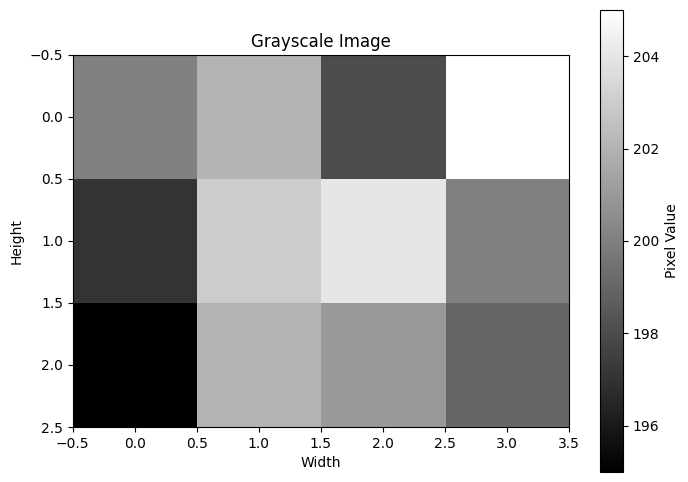

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.colorbar(label='Pixel Value')
plt.title('Grayscale Image')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()



The shape `(3, 4)` means the image has 3 rows (height) and 4 columns (width). 


Say that in our PyTorch ML project we have adopted the convention that the first dimension is the channel dimension (which is the Pytorch convention for image processing). So we would want to add a **channel** dimension as the first dimension to reshape this original `(3, 4)` image into a `(1, 3, 4)` grayscale image.


We can use `np.newaxis` to add this extra dimension in NumPy before converting to a PyTorch tensor:


In [3]:
image_3d = image[np.newaxis, :, :]
print(image_3d.shape)  # Output: (1, 3, 4)

(1, 3, 4)


Now, the shape `(1, 3, 4)` represents:

- **1 channel** (indicating grayscale),

- **3 rows** (height of the image),

- **4 columns** (width of the image).



Finally, you can convert this NumPy array to a PyTorch tensor and get going with our ML stuff:

In [4]:
import torch

image_tensor = torch.from_numpy(image_3d)
print(image_tensor.shape)  # Output: torch.Size([1, 3, 4])


torch.Size([1, 3, 4])


### Simple interpolation

A very useful numpy function is `np.interp()`, to interpolate values in arrays.

In [3]:
# Example of np.interp() - linear 1D interpolation
x = np.array([0, 1, 2, 3, 4])  # Known x values
y = np.array([0, 2, 4, 6, 8])  # Known y values

# Points where we want to interpolate
x_new = 0.5

# Interpolate y values at x_new point
y_new = np.interp(x_new, x, y)

print(y_new)


1.0


In [4]:
# Example of np.interp() with fill values
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 20, 30, 40, 50])

# Points outside the x range
x_new = np.array([0, 2.5, 6])

# Interpolate with fill values -999 and 999 for points outside range
y_new = np.interp(x_new, x, y, left=-999, right=999)

print("x values:", x_new)
print("Interpolated y values:", y_new)  # Will show -999 for x=0 and 999 for x=6

x values: [0.  2.5 6. ]
Interpolated y values: [-999.   25.  999.]


### Random number generation



Random floats:

In [5]:
np.random.rand()

0.7180328174572932

Or of any shape:

In [6]:
np.random.rand(3, 4)

array([[0.11386717, 0.91751388, 0.04063642, 0.13978831],
       [0.2809471 , 0.41062093, 0.1899919 , 0.59523401],
       [0.18907103, 0.71768755, 0.56104886, 0.79628566]])

Random integers:

In [7]:
# between 0 and 10, of shape (3, 4)
np.random.randint(0, 10, size=(3, 4))

array([[1, 8, 9, 7],
       [8, 8, 2, 8],
       [0, 2, 2, 8]])

Set a **random seed** (if you want to make the generated random numbers reproducible)
That is, if you do twice you get the same random numbers.

In [16]:
np.random.seed(42)

In [17]:
np.random.rand(), np.random.rand()


(0.3745401188473625, 0.9507143064099162)

In [22]:
np.random.seed(43)
np.random.rand(), np.random.rand()



(0.11505456638977896, 0.6090665392794814)

Random numbers from normal distribution:

In [23]:
# from a normal distribution with mean 0 and standard deviation 1, of size 50
np.random.normal(loc=0, scale=1, size=50)

array([-0.37850311, -0.5349156 ,  0.85807335, -0.41300998,  0.49818858,
        2.01019925,  1.26286154, -0.43921486, -0.34643789,  0.45531966,
       -1.66866271, -0.8620855 ,  0.49291085, -0.1243134 ,  1.93513629,
       -0.61844265, -1.04683899, -0.88961759,  0.01404054, -0.16082969,
        2.23035965, -0.39911572,  0.05444456,  0.88418182, -0.10798056,
        0.55560698,  0.39490664,  0.83720502, -1.40787817,  0.80784941,
       -0.13828364,  0.18717859, -0.38665814,  1.65904873, -2.04706913,
        1.39931699, -0.67900712,  1.52898513,  1.22121596,  1.01498852,
        0.82812998,  2.26629271, -0.59495567, -0.58126954, -0.65589415,
        0.92514885, -1.29916134,  1.01116687, -0.28844018, -1.06771307])

Random numbers from a uniform distribution:

In [24]:
# between 0 and 1, of size 50
np.random.uniform(low=0, high=1, size=50)


array([0.31026953, 0.24339802, 0.58810404, 0.24534325, 0.74777061,
       0.72014665, 0.69526087, 0.10274278, 0.94364243, 0.50333963,
       0.89967362, 0.19857988, 0.59444919, 0.96540858, 0.99869825,
       0.02416862, 0.48130333, 0.29142269, 0.06372057, 0.5696244 ,
       0.00508328, 0.61127759, 0.87018148, 0.88360146, 0.95431948,
       0.73986382, 0.18471296, 0.43467832, 0.8858995 , 0.25504628,
       0.44331269, 0.61693698, 0.10335251, 0.49010966, 0.0447044 ,
       0.31162747, 0.75203969, 0.71549909, 0.94155424, 0.77689537,
       0.21522851, 0.90497118, 0.55226415, 0.84489789, 0.92248948,
       0.82896128, 0.394198  , 0.59818814, 0.43269808, 0.69414714])

Random numbers without replacement:

In [25]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
# 5 numbers between 0 and 9, without replacement, i.e., no duplicates
np.random.choice(np.arange(10), size=5, replace=False)


array([4, 2, 9, 5, 0])

### Basic matrix operations


Define a matrix:


In [27]:
# Define a 3x3 matrix
A = np.array([[1, 2, 3],
              [0, 1, 4],
              [5, 6, 0]])

A, A.shape

(array([[1, 2, 3],
        [0, 1, 4],
        [5, 6, 0]]),
 (3, 3))

Invert the matrix:

In [28]:

inverse_A = np.linalg.inv(A)
print("Inverse of A:")
print(inverse_A)

Inverse of A:
[[-24.  18.   5.]
 [ 20. -15.  -4.]
 [ -5.   4.   1.]]


Multiply two matrices:

In [29]:
inverse_A @ A

array([[ 1.00000000e+00, -3.55271368e-15, -1.42108547e-14],
       [-2.66453526e-15,  1.00000000e+00,  0.00000000e+00],
       [ 6.66133815e-16,  4.44089210e-16,  1.00000000e+00]])

We can also use `np.matmul()` which is what `@` uses:

In [30]:
np.matmul(inverse_A, A)

array([[ 1.00000000e+00, -3.55271368e-15, -1.42108547e-14],
       [-2.66453526e-15,  1.00000000e+00,  0.00000000e+00],
       [ 6.66133815e-16,  4.44089210e-16,  1.00000000e+00]])

Or `np.dot()`:

In [31]:
np.dot(inverse_A, A)

array([[ 1.00000000e+00, -3.55271368e-15, -1.42108547e-14],
       [-2.66453526e-15,  1.00000000e+00,  0.00000000e+00],
       [ 6.66133815e-16,  4.44089210e-16,  1.00000000e+00]])

Note that `np.dot` and `np.matmul` differ for higher-dimensional (more than 2) arrays.


With `inverse_A @ A` we recover almost the identity matrix, but not quite, because of floating point precision issues.

Identity matrix:

"I" pronounced "eye"

In [32]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

or `np.identity`:

In [33]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

We can check that our previous inverse operation was correct by checking that `inverse_A @ A` is almost the identity matrix
with a small tolerance corresponding to floating point precision:

In [34]:
np.allclose(inverse_A @ A, np.eye(3))

True

`np.allclose` has two parameters:

- `atol`: absolute tolerance, set to `1e-6` by default.

- `rtol`: relative tolerance, set to `1e-5` by default.

The condition for two numbers `a` and `b` to be considered "close" is:
$$
|a - b| \leq \text{atol} + \text{rtol} \times |b|
$$

`atol` controls the absolute difference allowed, while `rtol` controls the relative difference allowed.

We can also check closeness with custom tolerances:

In [41]:
are_close = np.allclose(inverse_A @ A, np.identity(3), atol=1e-6, rtol=1e-5)
print(are_close)


True


## Scipy


SciPy is pronounced "Sigh Pie", not "Skeepy!"

It is like numpy, but with more functionality for scientific computing.




### Interpolation

In 1D:


In [35]:
import numpy as np
from scipy.interpolate import interp1d
x = np.array([1, 2, 3, 4, 5])
y = np.log(x)
f = interp1d(x, y, kind='linear')  # x, y are data arrays

x_new = 1.5
y_new = f(x_new)
y_new


array(0.34657359)

Can also operate on arrays:

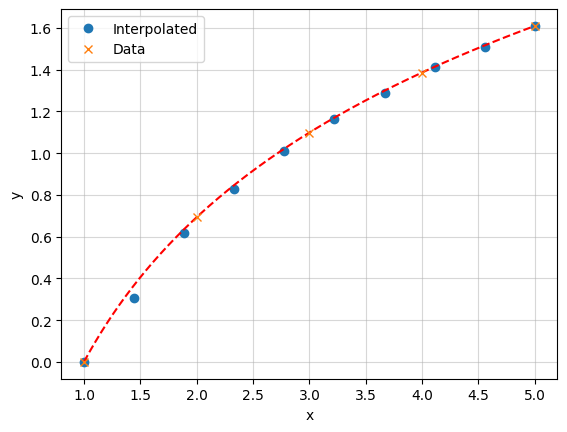

In [38]:
x_new = np.linspace(1, 5, 10)

import matplotlib.pyplot as plt
plt.plot(x_new, f(x_new), 'o', label='Interpolated')
xp = np.linspace(1,5,1000)
yp = np.log(xp)
plt.plot(xp,yp,ls='--',c='r')
plt.plot(x, y, 'x', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(which='both', alpha=0.5)
plt.show()

The x values don't need to be evenly spaced. 

However, the x values must be **monotonically increasing (sorted in ascending order)**.


#### Regularly spaced data in 2D

In 2D, on a regular grid, you can use `RectBivariateSpline` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RectBivariateSpline.html)), which does bivariate spline approximation over a rectangular mesh.



In [40]:
import numpy as np
from scipy.interpolate import RectBivariateSpline

# Define the x and y coordinates
x = np.linspace(0, 10, 10)
y = np.linspace(-1, 1, 5)

# Create a 2D grid for z values based on x and y
X, Y = np.meshgrid(x, y)
print("X.shape, Y.shape:", X.shape, Y.shape)


X.shape, Y.shape: (5, 10) (5, 10)


`np.meshgrid` creates 2D coordinate arrays from 1D arrays x and y.
(It's not broadcasting - instead it explicitly creates two new arrays)

- X has shape (5,10) and contains the x-coordinates repeated for each y value 

- Y has shape (5,10) and contains the y-coordinates repeated for each x value



In [41]:
X,Y

(array([[ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ],
        [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ],
        [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ],
        [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ],
        [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]]),
 array([[-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ],
        [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5

In [42]:
#Define a 2D function on this grid, for fun:
z = np.sin(X) * np.cos(Y)
print("z.shape:", z.shape, z.T.shape)  # Should print (5, 10), (10, 5)

# Initialize the RectBivariateSpline with x, y, and the 2D array z
f = RectBivariateSpline(x, y, z.T) # Note: Transpose z to match (len(x), len(y)), i.e. (10, 5)

# Define new x and y points for interpolation
new_x = np.linspace(0, 10, 100)
new_y = np.linspace(-2, 2, 50)

# Perform interpolation
z_interp = f(new_x, new_y)

# Output the interpolated values
print(z_interp)


z.shape: (5, 10) (10, 5)
[[-3.14525554e-19 -3.14525554e-19 -3.14525554e-19 ...  5.06462359e-18
   5.06462359e-18  5.06462359e-18]
 [ 6.41533305e-02  6.41533305e-02  6.41533305e-02 ...  6.41533305e-02
   6.41533305e-02  6.41533305e-02]
 [ 1.24462421e-01  1.24462421e-01  1.24462421e-01 ...  1.24462421e-01
   1.24462421e-01  1.24462421e-01]
 ...
 [-1.87678880e-01 -1.87678880e-01 -1.87678880e-01 ... -1.87678880e-01
  -1.87678880e-01 -1.87678880e-01]
 [-2.41220441e-01 -2.41220441e-01 -2.41220441e-01 ... -2.41220441e-01
  -2.41220441e-01 -2.41220441e-01]
 [-2.93935861e-01 -2.93935861e-01 -2.93935861e-01 ... -2.93935861e-01
  -2.93935861e-01 -2.93935861e-01]]


In [43]:
print(z.shape, z_interp.T.shape)

(5, 10) (50, 100)


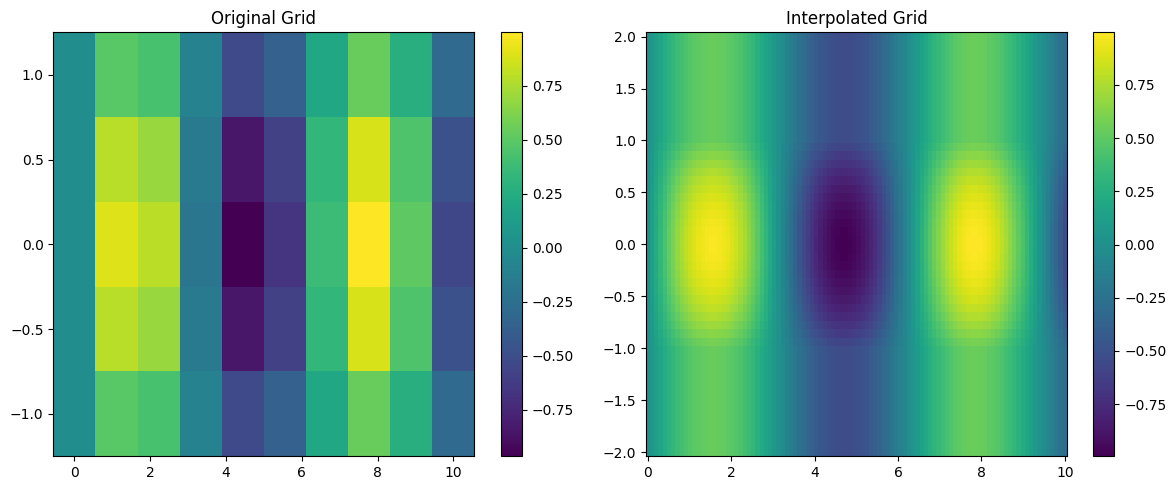

In [111]:
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot original grid
im1 = ax1.pcolormesh(X, Y, z)
ax1.set_title('Original Grid')
plt.colorbar(im1, ax=ax1)

# Create meshgrid for interpolated data
X_new, Y_new = np.meshgrid(new_x, new_y)

# Plot interpolated grid 
im2 = ax2.pcolormesh(X_new, Y_new, z_interp.T)
ax2.set_title('Interpolated Grid')
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()


<div class="exercise-box">
**Exercise:** How does `RectBivariateSpline` deal with extrapolation? Show all relevant examples.
</div>

##### Irregularly spaced data in 2D

`RectBivariateSpline` does not support irregularly spaced data.

In this case we use `griddata` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html)).


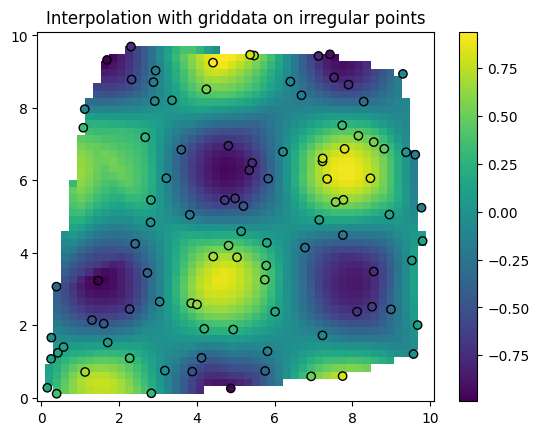

In [44]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Irregularly spaced data points
x = np.random.rand(100) * 10   # x-coordinates
y = np.random.rand(100) * 10   # y-coordinates
z = np.sin(x) * np.cos(y)      # Some function over x and y

# Define a grid where you want to interpolate
xi = np.linspace(0, 10, 50)
yi = np.linspace(0, 10, 50)
xi, yi = np.meshgrid(xi, yi)

# Interpolate with griddata
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plot the interpolated data
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.scatter(x, y, c=z, edgecolor='k')  # Show original points for reference
plt.colorbar()
plt.title("Interpolation with griddata on irregular points")
plt.show()


#### Higher dimensional interpolation


Because of the [**curse of dimensionality**](https://en.wikipedia.org/wiki/Curse_of_dimensionality), interpolation in higher dimensions is much more difficult.

Options become very limited, and the memory requirements become enormous.

For example a grid with 10 points per dimension in 10D has $10^{10}$ points. If you store floats, this is $10^{10} \times 4$ bytes = 40 TB.


In scipy, a few methods are available in principle, including:

- `RBFInterpolator` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RBFInterpolator.html#scipy.interpolate.RBFInterpolator)) for [radial basis functions](https://en.wikipedia.org/wiki/Radial_basis_function).

- `RegularGridInterpolator` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RegularGridInterpolator.html)) for regular grids.

- `LinearNDInterpolator` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.LinearNDInterpolator.html)) for piecewise linear interpolation.

- `griddata` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html)) for irregularly spaced data (including in higher dimensions).


But in practice, none of these will be good enough for high-dimensional and accurate interpolation.


<div class="exercise-box">
**Exercise:** Extend the 2D interpolation examples to 3D with `RegularGridInterpolator` and `RBFInterpolator`. Then to 4D.

Do some profiling of timing and memory per interpolator call.  Be careful, go step by step with small grids to make sure you don't push your computer too far.
</div>


As you will soon realize, if you have not already, is that deep neural networks have essentially solved the curse of dimensionality.
This is one of the three pillars of the AI revolution we are witnessing. See [here](https://www.youtube.com/watch?v=0Uqnh-_MRB8) at 2:18:18, for [Marc Mézard](https://en.wikipedia.org/wiki/Marc_Mézard)'s perspective on this. 



### Optimization and root finding

#### Optimization

Here, the goal is to find the minimum of a function. Think of your machine learning models for which you want to adjust weights and biases to minimize the loss function.


In `scipy` you can find minima using the `minimize` method ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)). 

Consider the following example.

In [1]:
import numpy as np
from scipy.optimize import minimize

def f(x):
    return (x - 2)**2 + 3

result = minimize(f, x0=0)
print("Minimum:", result.x)

Minimum: [1.99999999]


Under the hood, this method uses derivatives (i.e., gradients) to converge to the minimum.

The default method is the [Broyden-Fletcher-Goldfarb-Shanno (BFGS)](https://en.wikipedia.org/wiki/Broyden–Fletcher–Goldfarb–Shanno_algorithm) algorithm.


#### Root finding

Root finding is the problem of finding the solution of an equation $f(x) = a$, solving for $x$. This is the 
same as finding the zeros of the function $F(x) = f(x) - a$, i.e., solving $F(x) = 0$.

We want to be able to do this not only for a scalar $x$, but for a vector $x$ in more than one dimension.

Consider the following example.


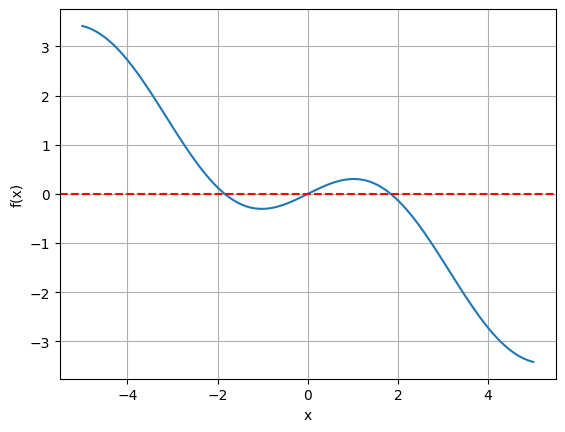

In [5]:
import matplotlib.pyplot as plt
# Define a single-variable function with y fixed
def f(x, a, b):
    return np.sin(x) * np.cos(a) - b*x


# Create a grid of x values
x = np.linspace(-5, 5, 100)

# Evaluate f for a=0.3, b=0.5
y = f(x, 0.3, 0.5)

# Plot
plt.figure()
plt.plot(x, y)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.axhline(y=0, color='r', linestyle='--')


An often used method for finding roots is the [Brent's method](https://en.wikipedia.org/wiki/Brent%27s_method), see also
the [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html). Notably, this method does not use derivatives, but a combination of bisection, secant and other interpolation techniques.


Other scipy methods are outlined in these [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).


In [6]:
import scipy 

# Set the value of a, b to fix
a=0.3
b=0.5

# Use brentq to find the root of f with respect to x for the fixed a, b
# Provide an interval [a, b] where f(x, a, b) changes sign
x_root = scipy.optimize.brentq(f, -4, 4, args=(a,b))

print("Root found for x with a, b fixed at", a, b, ":", x_root)


Root found for x with a, b fixed at 0.3 0.5 : 0.0


It found only one root.

To find the other roots, we could either split the interval by hand, or instead do this automatically with other `scipy` functionality


<div class="exercise-box">
**Exercise:** Find all roots of the function $f(x) = \sin(x)\cos(a) - bx$ for $a=0.3, b=0.5$ using `scipy` or any other package you like.
</div>


Let us now turn to a problem in more than one dimension.

In [8]:
# Define a function of two variables
def f(X):
    x, y = X
    return np.sin(x) * np.cos(y) - 0.5 


Let us plot it to get a sense of what we are dealing with.

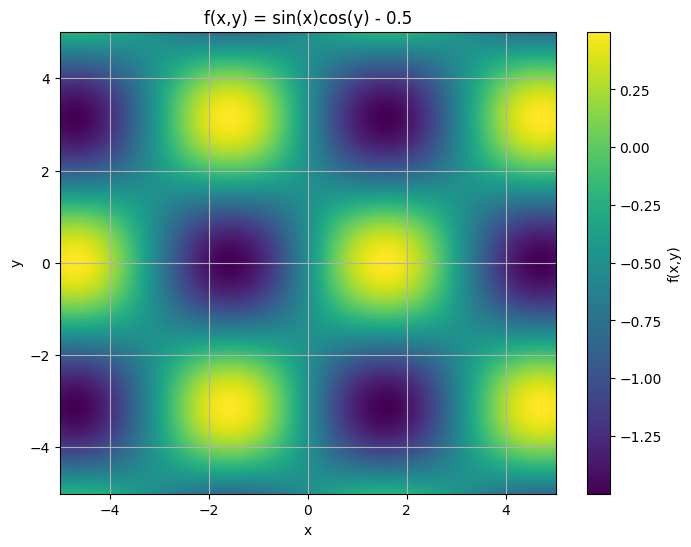

In [10]:

# Create a grid of points
x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 500)
X, Y = np.meshgrid(x, y)

# Evaluate function on the grid 
Z = np.sin(X) * np.cos(Y) - 0.5

# Create the contour plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(x, y, Z, cmap='viridis')
plt.colorbar(label='f(x,y)')
plt.xlabel('x')
plt.ylabel('y') 
plt.title('f(x,y) = sin(x)cos(y) - 0.5')
plt.grid(True)
plt.show()


Your goal is to find all the zeros, i.e., the points where the function is zero.

In [12]:
import scipy

# Define a function of two variables
def f(X):
    x, y = X
    return [np.sin(x) * np.cos(y) - 0.5,0] # we add 0 to make it a vector function so it can be used with scipy.optimize.root


# Initial guess for (x, y)
initial_guess = [0.5, 0.5]



result = scipy.optimize.root(f, initial_guess)

result.x


array([0.60619792, 0.5       ])

In [13]:
np.sin(result.x[0]) * np.cos(result.x[1]) - 0.5


1.1102230246251565e-16

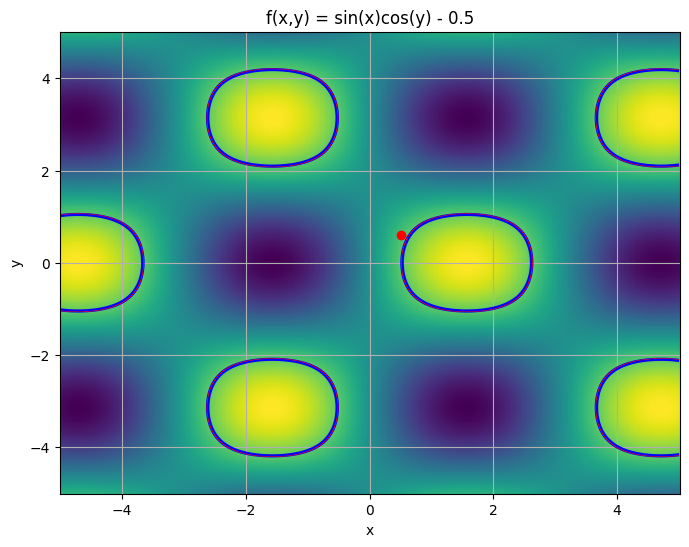

In [15]:
# Create the contour plot
plt.figure(figsize=(8, 6))

plt.pcolormesh(x, y, Z, cmap='viridis')
# plt.contour(X, Y, Z, levels=[0], colors='red', linewidths=2)  # Contour line where f(x, y) = 0
tolerance = 1e-2
plt.contour(X, Y, Z, levels=[-tolerance, 0, tolerance], colors=['blue', 'red', 'blue'], linewidths=1.5)
plt.scatter(result.x[1], result.x[0], c='r', marker='o', label='Root')
# plt.colorbar()
plt.xlabel('x')
plt.ylabel('y') 
plt.title('f(x,y) = sin(x)cos(y) - 0.5')
plt.grid(True)
plt.show()

In this case, our root finding algorithm has found a root but it is only approximate and it is one of many.

<div class="exercise-box">
**Exercise:** How do you deal with this problem? (Imagine you the function does not have a simple analytical form and roots can't be found analytically.)
</div>

### Integration


Integration is easily done with `scipy`.


Popular methods include trapezoidal rule, Simpson's rule, and Gaussian quadrature.



#### Trapezoidal Rule


The [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) approximates the area under the curve by dividing the interval into small segments, treating each segment as a trapezoid. It’s effective for linear functions but can be less accurate for non-linear functions unless the number of points is large.

- **Method**: `scipy.integrate.trapz`

- **Documentation**: [Trapezoidal Rule Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html)

#### Simpson’s Rule

[Simpson’s rule](https://en.wikipedia.org/wiki/Simpson%27s_rule) is a method that approximates the function by quadratic polynomials for each pair of segments. It’s generally more accurate than the trapezoidal rule, especially for smooth, continuous functions.

- **Method**: `scipy.integrate.simps`

- **Documentation**: [Simpson's Rule Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html)

#### Gaussian Quadrature

[Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature) uses the function's properties, including weight functions, to achieve highly accurate integration with fewer sample points. This method is typically more complex but very accurate, especially for functions that are not well-suited for simple segmenting.
Here we integrate functions, given function object.


- **Method**: `scipy.integrate.quad`

- **Documentation**: [Gaussian Quadrature (quad) Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html)



#### Recap 

- **Gaussian Quadrature (quad)** provides a very accurate result with an error estimate.

- **Trapezoidal Rule (trapz)** is relatively accurate for simple functions but less so than Simpson’s rule for the same number of points.

- **Simpson's Rule (simps)** typically yields more accurate results than the trapezoidal rule due to its use of quadratic interpolation.


In [17]:

import numpy as np
from scipy.integrate import quad, trapezoid, simpson
from scipy.special import erf

# Define the function
def f(x):
    return np.exp(-x**2)

# Analytical result
analytical_result = np.sqrt(np.pi) * erf(1)

# Define the interval and sample points for numerical integration
a, b = -1, 1
x_points = np.linspace(a, b, 50)  # 100 sample points for trapezoidal and Simpson's

# 1. Gaussian Quadrature (quad)
result_quad, error_quad = quad(f, a, b)

# 2. Trapezoidal Rule (trapz)
y_points = f(x_points)
result_trapz = trapezoid(y_points, x_points)

# 3. Simpson’s Rule (simps)
result_simps = simpson(y_points, x=x_points)

# Print the results for comparison
print("Analytical result:", analytical_result)
print("Gaussian Quadrature (quad):", result_quad, "(Estimated error:", error_quad, ")")
print("Trapezoidal Rule (trapz):", result_trapz)
print("Simpson's Rule (simps):", result_simps)

Analytical result: 1.4936482656248538
Gaussian Quadrature (quad): 1.493648265624854 (Estimated error: 1.6582826951881447e-14 )
Trapezoidal Rule (trapz): 1.4934439619354016
Simpson's Rule (simps): 1.4936485160802857


### Curve fitting


The most commonly used methods are the `least_squares` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html)) and `curve_fit` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)) methods. 

Both methods can fit a model function to data by minimizing the residuals between the data points and the model.

- `curve_fit` simpler and specifically designed for curve fitting.

- `least_squares` is more flexible, supporting constraints and different loss functions.

Here’s an example of fitting a Gaussian function to data using both `curve_fit` and `least_squares` and comparing the results.



We fit a Gaussian function defined as:
$$
f(x) = A \cdot e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$
where:

- $A$ is the amplitude,

- $\mu$ is the mean,

- $\sigma$ is the standard deviation.


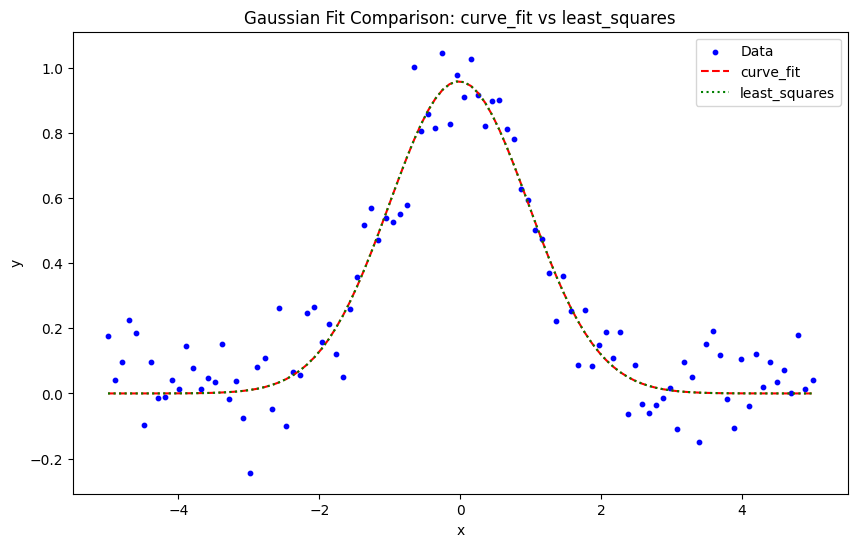

Fitted parameters with curve_fit:
Amplitude: 0.9585022299239285
Mean: -0.019283885304718633
Standard Deviation: 0.9878697913801381

Fitted parameters with least_squares:
Amplitude: 0.958502229434595
Mean: -0.019283877405705672
Standard Deviation: 0.9878697925887885


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, least_squares

# Define a Gaussian model function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Generate synthetic data with noise
np.random.seed(0)
x_data = np.linspace(-5, 5, 100)
y_data = gaussian(x_data, amplitude=1, mean=0, stddev=1) + 0.1 * np.random.normal(size=x_data.size)

# Using curve_fit
initial_guess = [1, 0, 1]  # Initial guess for amplitude, mean, stddev
params_curve_fit, covariance_curve_fit = curve_fit(gaussian, x_data, y_data, p0=initial_guess)

# Using least_squares
def residuals(params, x, y):
    amplitude, mean, stddev = params
    return y - gaussian(x, amplitude, mean, stddev)

# Perform least squares fitting
result_least_squares = least_squares(residuals, initial_guess, args=(x_data, y_data))
params_least_squares = result_least_squares.x

# Plot the data and the fitted curves
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label="Data", color="blue", s=10)
plt.plot(x_data, gaussian(x_data, *params_curve_fit), label="curve_fit", color="red", linestyle='--')
plt.plot(x_data, gaussian(x_data, *params_least_squares), label="least_squares", color="green", linestyle=':')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Gaussian Fit Comparison: curve_fit vs least_squares")
plt.show()

# Print the fitted parameters for comparison
print("Fitted parameters with curve_fit:")
print("Amplitude:", params_curve_fit[0])
print("Mean:", params_curve_fit[1])
print("Standard Deviation:", params_curve_fit[2])

print("\nFitted parameters with least_squares:")
print("Amplitude:", params_least_squares[0])
print("Mean:", params_least_squares[1])
print("Standard Deviation:", params_least_squares[2])


<div class="exercise-box">
**Exercise:** Why do we **not** recover exactly the parameters we used to generate the data?
</div>


Of course, you must always **report uncertainties** on your fitted parameters.



In [2]:
# Get uncertainties from covariance matrix for curve_fit
uncertainties_curve_fit = np.sqrt(np.diag(covariance_curve_fit))

print("\nUncertainties from curve_fit:")
print("Amplitude uncertainty:", uncertainties_curve_fit[0])
print("Mean uncertainty:", uncertainties_curve_fit[1]) 
print("Standard Deviation uncertainty:", uncertainties_curve_fit[2])

# Get uncertainties from least_squares Jacobian
# First get covariance matrix from Jacobian
J = result_least_squares.jac
residuals = result_least_squares.fun
N = len(x_data)
p = len(initial_guess)
s_sq = np.sum(residuals**2)/(N-p)
pcov = np.linalg.inv(J.T.dot(J))*s_sq
uncertainties_least_squares = np.sqrt(np.diag(pcov))

print("\nUncertainties from least_squares:")
print("Amplitude uncertainty:", uncertainties_least_squares[0])
print("Mean uncertainty:", uncertainties_least_squares[1])
print("Standard Deviation uncertainty:", uncertainties_least_squares[2])



Uncertainties from curve_fit:
Amplitude uncertainty: 0.02950066600638019
Mean uncertainty: 0.0351080549633649
Standard Deviation uncertainty: 0.03510806105403314

Uncertainties from least_squares:
Amplitude uncertainty: 0.029500644850377074
Mean uncertainty: 0.035108110586207275
Standard Deviation uncertainty: 0.035108110501253904


<div class="exercise-box">
**Exercise:** Given the uncertainties, are the fitted parameters consistent with the true parameters? Give a quatitative and statistical answer.
</div>

### Linear Algebra

### Matrix diagonalization

As in `numpy`, `scipy` has native methods for taking determinants, inverses, and eigenvalues.

Here is a simple example.

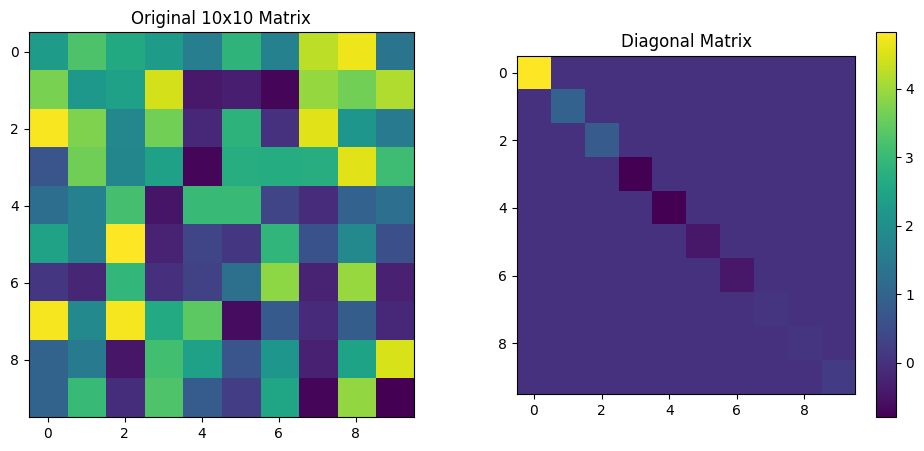

0.012191309322200526
Trace of original matrix: 4.457529730942303
Trace of (real) diagonal matrix: 4.457529730942312
Trace of (imaginary) diagonal matrix: 5.551115123125783e-17


In [3]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Create a random 10x10 matrix for demonstration
np.random.seed(0)
matrix = np.random.rand(10, 10)

# Calculate the inverse, determinant, and eigenvalues/eigenvectors
matrix_inv = la.inv(matrix)
det = la.det(matrix)
eigvals, eigvecs = la.eig(matrix)

# Diagonalized matrix: D = V^-1 * A * V (where V is the eigenvector matrix)
# This reconstructs the diagonal form using the eigenvalues
diagonal_matrix = np.diag(eigvals.real)  # Only real part for visualization
imaginary_diagonal_matrix = np.diag(eigvals.imag)  # imaginary part 
# Plotting the original and diagonalized matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Show original matrix
axs[0].imshow(matrix, cmap="viridis")
axs[0].set_title("Original 10x10 Matrix")

# Show diagonalized matrix
axs[1].imshow(diagonal_matrix, cmap="viridis")
axs[1].set_title("Diagonalized Matrix (Eigenvalues on Diagonal)")

# Add subplot for eigenvector matrix
axs[1].set_title("Diagonal Matrix")
plt.colorbar(axs[1].imshow(diagonal_matrix, cmap="viridis"), ax=axs[1])

plt.show()

# Output determinant for reference
print(det)

# Calculate and print traces
print(f"Trace of original matrix: {np.trace(matrix)}")
print(f"Trace of (real) diagonal matrix: {np.trace(diagonal_matrix)}")
print(f"Trace of (imaginary) diagonal matrix: {np.trace(imaginary_diagonal_matrix)}")



As you see here, the trace of the imaginary part of the diagonalized matrix is zero and the trace of the real part is the sum of the eigenvalues.

<div class="exercise-box">
**Exercise:** Plot the matrix of eigeinvectors. Are the eigenvectors orthonormal?
</div>

<div class="exercise-box">
**Exercise:** Look at the imaginary part of the diagonalized matrix. Why is its trace zero?
</div>

### Cholesky decomposition


Say you have a set of 10 numbers.
Think of ten data points, for instance 10 measurement of a quantity at different times, or locations. For Economics students, think of 10 prices of the same stock at different times.


In [6]:
data = np.array([0.72525428, 0.50132438, 0.95608363, 0.6439902 , 0.42385505,
       0.60639321, 0.0191932 , 0.30157482, 0.66017354, 0.29007761])



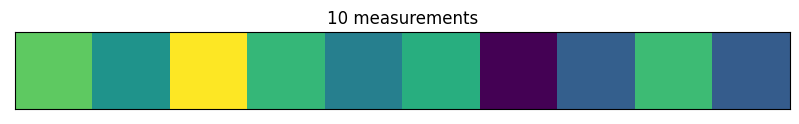

In [7]:
# Reshape to 2D array for imshow (1x10)
data_2d = data.reshape(1, -1)

# Create figure and axis
plt.figure(figsize=(10, 1))

# Show the data
plt.imshow(data_2d, cmap='viridis', aspect='auto')
plt.title('10 measurements')
plt.yticks([])  # Hide y-axis ticks since it's a 1D vector
plt.xticks([])  # Hide x-axis ticks

plt.show()


Now, assume that the data points are correlated, i.e., the value at one point is related to the value at another point. The data points **co-vary**. 

Assume that the data points are generated by a Gaussian process.

To characterize the statistical properties of the data, we can use the covariance matrix $\Sigma$. We know that it is symmetric and positive semi-definite and because of the correlation, it is not diagonal.

Then, assume I give you the covariance matrix $\Sigma$ (which I inferred from a model of the data generating process, for instance a financial or physical model).

I now ask you to generate loads of data points (i.e., samples) coming from this Gaussian process. (This amounts to simulating the data generating process, the starting point of [simulation based inference methods](https://astroautomata.com/blog/simulation-based-inference/).)


To do this, you can use the Cholesky decomposition of the covariance matrix. The Cholesky decomposition allows us to factorize $ \Sigma $ as:
   $$
   \Sigma = L L^\top,
   $$

where $L$ is a lower triangular matrix. The Cholesky decomposition is possible because $ \Sigma $ is positive semi-definite. 

To generate samples from the Gaussian process with covariance $\Sigma$, we start with a vector $\mathbf{z}$ of independent standard normal variables (zero mean and unit variance).


Then, we multiply $\mathbf{z}$ by $L$ to introduce the desired correlations: 
$$
\mathbf{x} = L \mathbf{z}.
$$

The resulting vector $\mathbf{x}$ has covariance $\Sigma$ because:
$$
\text{Cov}(\mathbf{x}) = \text{Cov}(L \mathbf{z}) = L \text{Cov}(\mathbf{z}) L^\top = L I L^\top = \Sigma.
$$


Let's do it. 



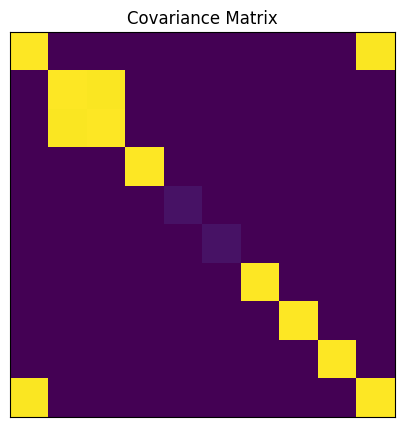

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Create a 10x10 covariance matrix with specific correlation structure
n = 10
covmat = np.zeros((n,n))

# Set diagonal elements to 1
np.fill_diagonal(covmat, 1.0)

# Set larger non-diagonal elements in first 3 elements and 10th element

covmat[2,1] = 1.99
covmat[0,-1] = 1.99


covmat[5,5] = 0.05
covmat[4,4] = 0.05


# Make symmetric
covmat = (covmat + covmat.T)/2

# Visualize the covariance matrix
plt.figure(figsize=(5,5))
plt.imshow(covmat, cmap='viridis')
plt.title('Covariance Matrix')
_ = plt.xticks([])
_ = plt.yticks([])





In [10]:
import pandas as pd
import scipy
# Compute Cholesky decomposition of covariance matrix
L = scipy.linalg.cholesky(covmat)

# Generate 20 independent standard normal samples
n = covmat.shape[0]
z = np.random.standard_normal((n, 20))

# Transform to correlated samples using Cholesky factor
x = L @ z

# Convert correlated samples to DataFrame
df = pd.DataFrame(x.T)



In [12]:
df


,0,1,2,3,4,5,6,7,8,9
0,-2.348065,2.257694,0.037595,-1.491258,-0.111363,-0.079155,-0.369182,-0.955945,-0.637437,-0.118737
1,0.396544,-2.441663,-0.109803,0.439392,0.431456,-0.307448,-0.239379,-0.345982,-0.397272,-0.050618
2,-0.127670,-0.973738,0.029787,0.166673,0.212297,-0.143917,1.099660,-0.463596,-0.132881,-0.059557
3,-1.588548,2.289151,0.132473,0.635031,0.019577,-0.497168,0.655264,0.481481,-0.297791,-0.005250
4,-0.438346,-1.864218,-0.069370,2.383145,-0.274016,0.139806,0.640132,-1.540797,-0.309013,-0.193386
5,2.083724,1.794735,-0.014945,0.944479,0.188805,-0.358231,-1.616956,0.063262,-1.676004,0.018854
6,1.700051,-0.846597,-0.043461,-0.912822,-0.223655,-0.246948,-0.024326,0.156507,1.152332,0.052324
7,-0.091945,1.092563,0.184695,1.117016,-0.345421,0.011664,-0.738031,0.232181,1.079619,0.008831
8,-1.380084,2.591875,0.067145,-1.315907,0.265652,-0.165371,0.279925,-0.597316,-0.813364,-0.031050
9,1.151365,1.885939,0.040695,-0.461585,0.070871,0.345029,-0.098150,-0.237922,-1.466424,0.009728


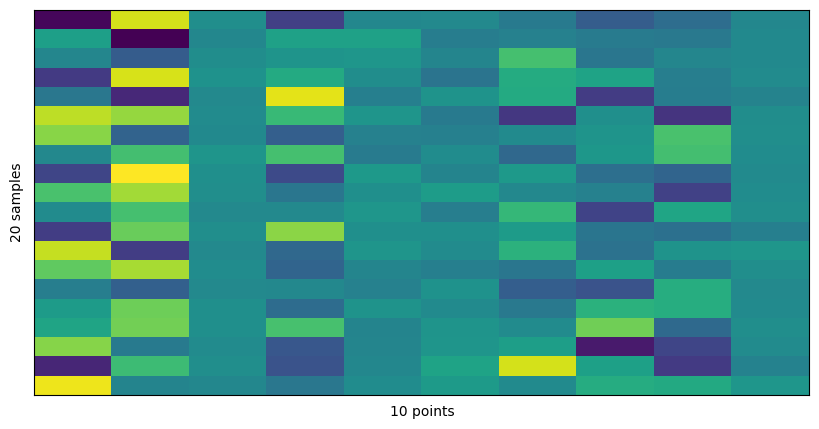

In [13]:
# Plot the DataFrame using imshow
plt.figure(figsize=(10, 5))
plt.imshow(df, aspect='auto', cmap='viridis')

plt.xlabel("10 points")
plt.ylabel("20 samples")
_ = plt.xticks([])
_ = plt.yticks([])


To recap, you can remember that the Cholesky decomposition is useful for simulating multivariate normal data because it transforms independent, standard normal variables into correlated variables with the desired covariance structure.

<div class="exercise-box">
**Exercise:** Generate 100 samples and check that $\text{Cov}(\mathbf{x}) = \Sigma$.
</div>



### Statistics


We walk through an example from finance that uses the most basic scipy functionalities you need to know. 

For the statistical concepts, you should refer to your course on statistics.

The pandas methods used here will be briefly reviewed in the next section.


Let us first get some data. 


In [14]:

import yfinance as yf

# Download S&P 500 data between 1990 and 2006
sp500 = yf.download('^GSPC', start='1990-01-01', end='2006-12-31')

sp500_clean_pct = sp500["Adj Close"].pct_change().dropna()*100.

# Calculate daily percentage change of adjusted close prices
mean_pct_change = sp500_clean_pct.mean()

# Output the mean daily percentage change
print("Mean daily percentage change in Adjusted Close (1990-2006):", mean_pct_change, "%")


[*********************100%%**********************]  1 of 1 completed
Mean daily percentage change in Adjusted Close (1990-2006): 0.03696221433676162 %


/Users/boris/opt/miniconda3/lib/python3.9/site-packages/yfinance/utils.py:781: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [352]:
sp500_clean_pct.head()

Ticker,^GSPC
Date,
1990-01-03 00:00:00+00:00,-0.258554
1990-01-04 00:00:00+00:00,-0.861299
1990-01-05 00:00:00+00:00,-0.975624
1990-01-08 00:00:00+00:00,0.451447
1990-01-09 00:00:00+00:00,-1.178669


In [15]:
sp500_clean_pct.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 4286 entries, 1990-01-03 to 2006-12-29
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
4286 non-null   float64
dtypes: float64(1)
memory usage: 67.0 KB


In [16]:
sp500_clean_pct.describe()

count    4286.000000
mean        0.036962
std         0.994737
min        -6.865684
25%        -0.464298
50%         0.044357
75%         0.552815
max         5.732729
Name: Adj Close, dtype: float64

Show an histogram of the daily price change over 26 years.  

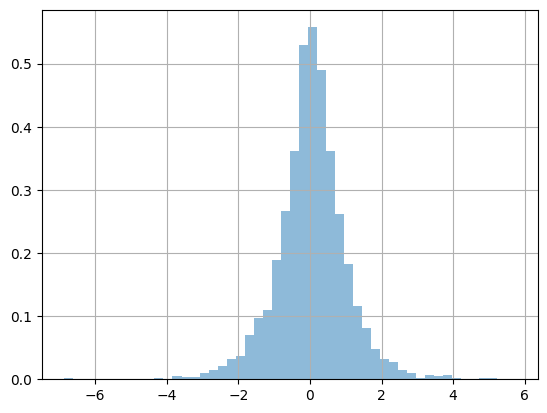

In [17]:
_ =sp500_clean_pct.hist(bins=50,density=True,histtype="stepfilled",alpha=0.5)


After a reformatting step, you can easily compare the data to a normal distribution with [scipy.stats.probplot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html).

In [18]:
sp500_clean_pct.squeeze()

Date
1990-01-03   -0.258554
1990-01-04   -0.861299
1990-01-05   -0.975624
1990-01-08    0.451447
1990-01-09   -1.178669
                ...   
2006-12-22   -0.531625
2006-12-26    0.435227
2006-12-27    0.701527
2006-12-28   -0.147878
2006-12-29   -0.451309
Name: Adj Close, Length: 4286, dtype: float64

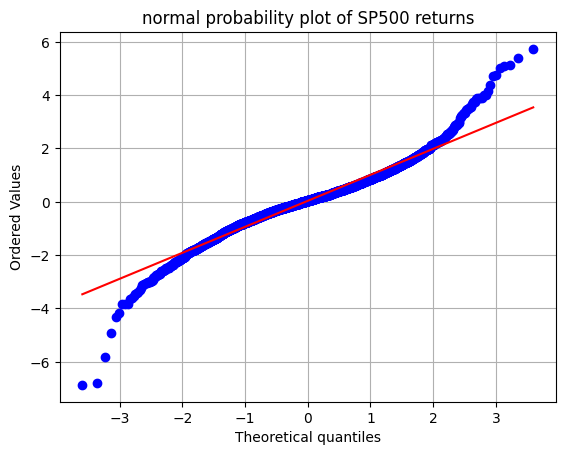

In [19]:
scipy.stats.probplot(sp500_clean_pct.squeeze(),
                     dist=scipy.stats.norm,
                     plot=plt.figure().add_subplot(111))
plt.title("normal probability plot of SP500 returns")
plt.grid(True)


<div class="exercise-box">
**Exercise:** What would you expect if this data was normally distributed?
</div>


We can **fit distributions** with scipy stats.


Consider the following where we find parameters of analytical distributions that best fit the data.




In [21]:
tdf, tmean, tsigma = scipy.stats.t.fit(sp500_clean_pct)
print(tdf, tmean, tsigma)

3.685280924973241 0.04256936538696089 0.7005813069239666


We can compare real data and fitted distribution on a probability plot.

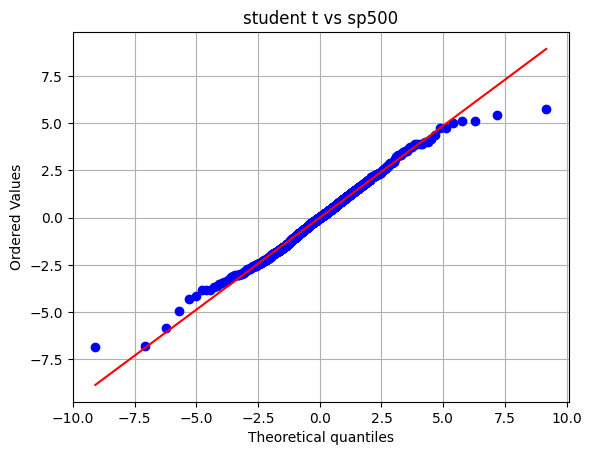

In [22]:

scipy.stats.probplot(sp500_clean_pct.squeeze(),
                     dist=scipy.stats.t,sparams=(tdf,tmean,tsigma),plot=plt.figure().add_subplot(111))
plt.title("student t vs sp500")
plt.grid(True)

As a last examples, you can use scipy stats to build cumulative distribution.

In [23]:
import numpy as np
x = np.linspace(-10,10,1000)
cdf_student = scipy.stats.t.cdf(x,tdf, loc=tmean, scale=tsigma)
cdf_norm = scipy.stats.norm.cdf(x, loc=tmean,scale=tsigma)

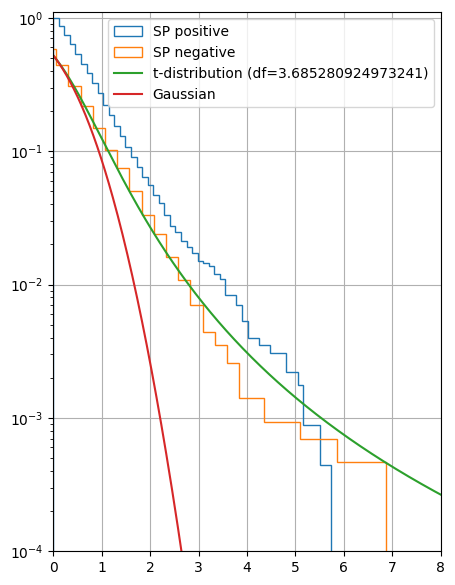

In [24]:
fig = plt.figure()
fig.set_size_inches(5, 7)
ax = fig.add_subplot(1, 1, 1)  # Create a single subplot to use as the axis

sp500_clean_pct_pos = sp500_clean_pct[sp500_clean_pct > 0]
sp500_clean_pct_neg = -sp500_clean_pct.copy()

# Pass `ax` to ensure both histograms plot on the same axes
sp500_clean_pct_pos.hist(bins=50, density=True, histtype="step", cumulative=-1, label="SP positive", ax=ax)
sp500_clean_pct_neg.hist(bins=50, density=True, histtype="step", cumulative=-1, label="SP negative", ax=ax)

# Plot additional lines on the same axis
ax.plot(x, 1. - cdf_student, label=f"t-distribution (df={tdf})")
ax.plot(x, 1. - cdf_norm, label="Gaussian")
ax.set_yscale("log")
ax.set_ylim(1e-4, 1.1)
ax.set_xlim(0., 8)
ax.legend()
plt.show()

### Signal Processing

The most important function for signal processing is the [Fourier Transform](https://en.wikipedia.org/wiki/Fourier_transform).

The mathematical formula for the Fourier Transform is:
$$
\hat{f}(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i \omega t} dt
$$
which takes us from the time domain to the frequency domain. To go back, we have the Inverse Fourier Transform:
$$
f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \hat{f}(\omega) e^{i \omega t} d\omega
$$

Time could be the time of a stock price, or the time of a sound wave, or the time of a seismic signal, etc. We could trade time for space, and the Fourier Transform would take us to the wavenumber domain, i.e., from $x$ to $k$.
Or we could trade time for anything.

Of course, the computer does not know about continuous functions. The best it can do is to sample the function at discrete points and the integrals above become sums. The corresponing formulas are called the [Discrete Fourier Transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform).


Why is the Fourier transform so useful? Because it allows us to perform [filtering](https://en.wikipedia.org/wiki/Filter_(signal_processing)) and [convolutions](https://en.wikipedia.org/wiki/Convolution). 



`scipy` has multiple methods to allow us to work with Fourier transforms. The main ones you need to use are:

- [scipy.fft.fft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html): computes the 1-D $n$-point discrete Fourier Transform (DFT) of an array $x$ (real or complex) using the Fast Fourier Transform (FFT) algorithm ([Cooley and Tukey (1965)](https://www.jstor.org/stable/2003354)), see also [Wikipedia](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm).


- [scipy.fft.ifft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.ifft.html): computes the inverse Fourier Transform.


- [scipy.fft.fftfreq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html): computes the frequency array for the Fourier Transform.


- [scipy.fft.fftshift](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftshift.html): shifts the zero frequency to the center of the frequency array (useful for plotting and further processing).


Beyond, this there are important aspects to remember about numerical implenmentation of the Fourier Transform. Namely, the Fast Fourier Transform (FFT) algorithm is of complexity $O(n \log n)$, which is much faster than the naive $O(n^2)$ algorithm that you would probably implement if I asked you to compute a Fourier Transform.  This is because the FFT is a [divide-and-conquer](https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm) algorithm, based on an odd and even split of the grid. For this reason, it is good practice to use powers of 2 for the number of points $n$ (for instance 512 (i.e., $2^9$), 1024 ($2^10$), 2048 ($2^11$), etc.).



#### Filtering in 1D

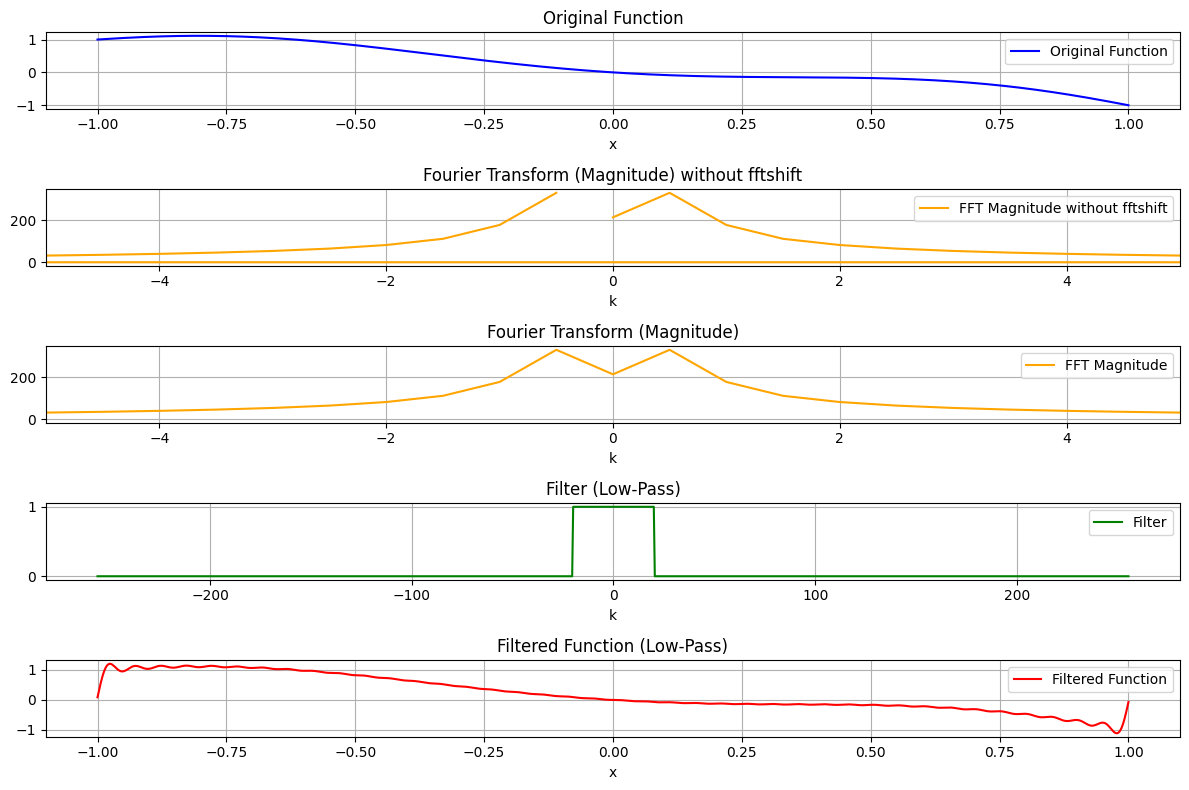

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift

# Define the polynomial function
x = np.linspace(-1, 1, 1024)  # High-resolution sample points
f_x = x**6 - 3*x**4 + 2*x**2 - x  # 6th-order polynomial

# Compute the Fourier transform using scipy.fft
fft_f = fft(f_x)
freq = fftfreq(len(x), d=(x[1] - x[0]))  # Frequency bins, correctly scaled (if not scaled, the frequency spacing will default to 1, which wrong)

# Define a low-pass filter
cutoff = 20  # Define the cutoff frequency
filter_mask = np.abs(freq) <= cutoff  # Boolean mask for frequencies
filtered_fft_f = fft_f * filter_mask  # Apply the filter

# Compute the inverse Fourier transform to reconstruct the filtered signal
filtered_f_x = ifft(filtered_fft_f)

# Plot the results
plt.figure(figsize=(12, 8))

# Original function
plt.subplot(5, 1, 1)
plt.plot(x, f_x, label="Original Function", color='blue')
plt.xlabel("x")
plt.title("Original Function")
plt.grid()
plt.legend()

# Fourier Transform (Magnitude) with fftshift
plt.subplot(5, 1, 2)
plt.plot(freq, np.abs(fft_f), label="FFT Magnitude without fftshift", color='orange')
plt.title("Fourier Transform (Magnitude) without fftshift")
plt.xlabel("k")
plt.xlim(-5, 5)
plt.grid()
plt.legend()


# Fourier Transform (Magnitude)
plt.subplot(5, 1, 3)
plt.plot(fftshift(freq), fftshift(np.abs(fft_f)), label="FFT Magnitude", color='orange')
plt.title("Fourier Transform (Magnitude)")
plt.xlabel("k")
plt.xlim(-5, 5)
plt.grid()
plt.legend()

# Filter
plt.subplot(5, 1, 4)
plt.plot(fftshift(freq), fftshift(filter_mask), label="Filter", color='green')
plt.title("Filter (Low-Pass)")
plt.xlabel("k")
plt.grid()
plt.legend()

# Filtered function
plt.subplot(5, 1, 5)
plt.plot(x, np.real(filtered_f_x), label="Filtered Function", color='red')
plt.title("Filtered Function (Low-Pass)")
plt.xlabel("x")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()



Check the effect of the fftshift method:


In [22]:
fftshift(freq)

array([-255.75      , -255.25048828, -254.75097656, ...,  254.25146484,
        254.75097656,  255.25048828])

In [23]:
freq

array([ 0.        ,  0.49951172,  0.99902344, ..., -1.49853516,
       -0.99902344, -0.49951172])

Here is the same plot with sliding scales for relevant parameters. 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift
import ipywidgets as widgets
from ipywidgets import interact

# Define the interactive plotting function
def interactive_plot(a4=1.0, a3=-3.0, a2=2.0, a1=-1.0, p1=0.0, cutoff=20):
    # Define the polynomial function
    x = np.linspace(-1, 1, 1024)  # High-resolution sample points
    f_x = a4 * x**4 + a3 * np.sin(20*2.*np.pi*(x+p1)) + a2 * x**2 + a1 * x  # Polynomial with adjustable coefficients

    # Compute the Fourier transform
    fft_f = fft(f_x)
    freq = fftfreq(len(x), d=(x[1] - x[0]))  # Frequency bins

    # Define a low-pass filter
    filter_mask = np.abs(freq) <= cutoff  # Boolean mask for frequencies
    filtered_fft_f = fft_f * filter_mask  # Apply the filter

    # Compute the inverse Fourier transform to reconstruct the filtered signal
    filtered_f_x = ifft(filtered_fft_f)

    # Plot the results
    plt.figure(figsize=(12, 8))

    # Original function
    plt.subplot(4, 1, 1)
    plt.plot(x, f_x, label="Original Function", color='blue')
    plt.xlabel("x")
    plt.title("Original Function")
    plt.grid()
    plt.legend()

    # Fourier Transform (Magnitude) with fftshift
    plt.subplot(4, 1, 2)
    plt.plot(fftshift(freq), fftshift(np.abs(fft_f)), label="FFT Magnitude", color='orange')
    plt.title("Fourier Transform (Magnitude)")
    plt.xlabel("k")
    plt.xlim(-5, 5)
    plt.grid()
    plt.legend()

    # Filter
    plt.subplot(4, 1, 3)
    plt.plot(fftshift(freq), fftshift(filter_mask), label="Filter", color='green')
    plt.title("Filter (Low-Pass)")
    plt.xlabel("k")
    plt.xlim(-20, 20)
    plt.grid()
    plt.legend()

    # Filtered function
    plt.subplot(4, 1, 4)
    plt.plot(x, np.real(filtered_f_x), label="Filtered Function", color='red')
    plt.title("Filtered Function (Low-Pass)")
    plt.xlabel("x")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create sliders for coefficients and cutoff frequency
interact(
    interactive_plot,
    a4=widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='a4'),
    a3=widgets.FloatSlider(value=-3.0, min=-5.0, max=5.0, step=0.1, description='a3'),
    a2=widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='a2'),
    a1=widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='a1'),
    cutoff=widgets.IntSlider(value=20, min=0, max=20, step=1, description='Cutoff'),
)


interactive(children=(FloatSlider(value=0.0, description='a4', max=5.0, min=-5.0), FloatSlider(value=-3.0, des…

<function __main__.interactive_plot(a4=1.0, a3=-3.0, a2=2.0, a1=-1.0, p1=0.0, cutoff=20)>

Even for real data, the Fourier Transform is complex-valued, hence it has a magnitude but also a phase:

$$
F(k)=|F(k)|e^{i\phi(k)}
$$

where $\phi(k)$ is the phase.

In a simple case of a sinusoidal signal, the phase encodes the shift of the sinusoid with respect to the origin.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift
import ipywidgets as widgets
from ipywidgets import interact

# Define the interactive plotting function
def interactive_plot(a4=1.0, a3=-3.0, a2=2.0, a1=-1.0, p1=1.0, cutoff=20):
    # Define the polynomial function
    x = np.linspace(-1, 1, 1024)  # High-resolution sample points
    f_x = a4 * x**4 + a3 * np.sin(2*2.*np.pi*(x+p1)) + a2 * x**2 + a1 * x  # Polynomial with adjustable coefficients

    # Compute the Fourier transform
    fft_f = fft(f_x)
    freq = fftfreq(len(x), d=(x[1] - x[0]))  # Frequency bins

    # Compute the phase
    phase = np.angle(fft_f)

    # Define a low-pass filter
    filter_mask = np.abs(freq) <= cutoff  # Boolean mask for frequencies
    filtered_fft_f = fft_f * filter_mask  # Apply the filter

    # Compute the inverse Fourier transform to reconstruct the filtered signal
    filtered_f_x = ifft(filtered_fft_f)

    # Plot the results
    plt.figure(figsize=(12, 10))

    # Original function
    plt.subplot(5, 1, 1)
    plt.plot(x, f_x, label="Original Function", color='blue')
    plt.xlabel("x")
    plt.title("Original Function")
    plt.grid()
    plt.legend()

    # Fourier Transform (Magnitude) with fftshift
    plt.subplot(5, 1, 2)
    plt.plot(fftshift(freq), fftshift(np.abs(fft_f)), label="FFT Magnitude", color='orange')
    plt.title("Fourier Transform (Magnitude)")
    plt.xlabel("k")
    plt.xlim(-5, 5)
    plt.grid()
    plt.legend()

    # Fourier Transform (Phase) with fftshift
    plt.subplot(5, 1, 3)
    plt.plot(fftshift(freq), fftshift(phase), label="FFT Phase", color='purple')
    plt.title("Fourier Transform (Phase)")
    plt.xlabel("k")
    plt.xlim(-5, 5)
    plt.grid()
    plt.legend()

    # Filter
    plt.subplot(5, 1, 4)
    plt.plot(fftshift(freq), fftshift(filter_mask), label="Filter", color='green')
    plt.title("Filter (Low-Pass)")
    plt.xlabel("k")
    plt.xlim(-20, 20)
    plt.grid()
    plt.legend()

    # Filtered function
    plt.subplot(5, 1, 5)
    plt.plot(x, np.real(filtered_f_x), label="Filtered Function", color='red')
    plt.title("Filtered Function (Low-Pass)")
    plt.xlabel("x")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create sliders for coefficients and cutoff frequency
interact(
    interactive_plot,
    a4=widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='a4'),
    a3=widgets.FloatSlider(value=-3.0, min=-5.0, max=5.0, step=0.1, description='a3'),
    a2=widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='a2'),
    a1=widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='a1'),
    p1=widgets.FloatSlider(value=-1, min=-1, max=1, step=0.1, description='p1'),
    cutoff=widgets.IntSlider(value=2, min=0, max=2, step=0.2, description='Cutoff'),
)


interactive(children=(FloatSlider(value=0.0, description='a4', max=5.0, min=-5.0), FloatSlider(value=-3.0, des…

<function __main__.interactive_plot(a4=1.0, a3=-3.0, a2=2.0, a1=-1.0, p1=1.0, cutoff=20)>

<div class="exercise-box">
**Exercise:** What are the properties of the phase for a real valued signal? Discuss when the signal is even (symmetric) and when it is odd (antisymmetric).
</div>






#### Fourier transforms of 2D data

The Fourier transform works in more than one dimension. It is very useful for image processing, or in Economics for the analysis of spatio-temporal data (e.g., heatmaps of economic activity).



In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from ipywidgets import interactive
import ipywidgets as widgets

# Function to generate an image with straight stripes at a given angle
def generate_stripe_image(angle_deg, image_size=64, stripe_width=4):
    angle = np.deg2rad(angle_deg)
    image = np.zeros((image_size, image_size))
    
    # Create a grid of coordinates
    y, x = np.meshgrid(np.arange(image_size), np.arange(image_size))
    
    # Rotate the grid to apply the stripe pattern at the specified angle
    x_rot = x * np.cos(angle) + y * np.sin(angle)
    
    # Create vertical stripes in the rotated grid
    image[np.mod(x_rot, stripe_width * 2) < stripe_width] = 255
    
    return image

# Function to update and display the Fourier transform as the angle changes
def update_stripe_orientation(angle_deg):
    # Generate the rotated stripe image
    image = generate_stripe_image(angle_deg)
    
    # Perform 2D Fourier transform
    f_transform = fftshift(fft2(image))
    
    # Calculate magnitude and phase
    magnitude = np.abs(f_transform)
    phase = np.angle(f_transform)
    
    # Plot the original image, magnitude, and phase
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Original Image (Stripes {angle_deg}°)")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(np.log(1 + magnitude), cmap='gray')
    plt.title("Magnitude")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(phase, cmap='gray')
    plt.title("Phase")
    plt.axis('off')
    
    plt.show()

# Create the interactive widget for adjusting stripe orientation
interactive_plot = interactive(update_stripe_orientation, angle_deg=widgets.FloatSlider(value=0, min=0, max=90, step=1, description='Angle (°):'))
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='Angle (°):', max=90.0, step=1.0), Output(layout=Layo…

With a sinusoidal grating, the magnitude spectrum will show two strong peaks in opposite directions, corresponding to the fundamental frequency of the grating, as shown in the following figure.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets

# Function to generate sinusoidal grating pattern at a given angle and frequency
def generate_sinusoidal_grating(angle_deg, frequency=5, image_size=64):
    angle = np.deg2rad(angle_deg)
    # Create a grid of coordinates
    y, x = np.meshgrid(np.linspace(-1, 1, image_size), np.linspace(-1, 1, image_size))
    
    # Apply the rotation to the grid
    x_rot = x * np.cos(angle) + y * np.sin(angle)
    
    # Generate the sinusoidal grating pattern
    image = 127.5 * (1 + np.sin(2 * np.pi * frequency * x_rot))  # Sinusoidal pattern between 0 and 255
    
    return image

# Function to update and display the Fourier transform as the angle and frequency change
def update_sinusoidal_grating(angle_deg, frequency):
    # Generate the rotated sinusoidal grating image
    image = generate_sinusoidal_grating(angle_deg, frequency)
    
    # Perform 2D Fourier transform
    f_transform = np.fft.fftshift(np.fft.fft2(image))
    
    # Calculate magnitude and phase
    magnitude = np.abs(f_transform)
    phase = np.angle(f_transform)
    
    # Plot the original image, magnitude, and phase
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Sinusoidal Grating (Angle {angle_deg}°, Frequency {frequency})")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(np.log(1 + magnitude), cmap='gray')
    plt.title("Magnitude")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(phase, cmap='gray')
    plt.title("Phase")
    plt.axis('off')
    
    plt.show()

# Create the interactive widget for adjusting the angle and frequency of the sinusoidal grating
interactive_plot = interactive(
    update_sinusoidal_grating, 
    angle_deg=widgets.FloatSlider(value=0, min=0, max=90, step=1, description='Angle (°):'),
    frequency=widgets.FloatSlider(value=5, min=1, max=20, step=1, description='Frequency:')
)
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='Angle (°):', max=90.0, step=1.0), FloatSlider(value=…

**Magnitude interpretation**: strong peaks (bands) at the spatial frequency corresponding to the wavelength of the sinusoidal grating.


**Phase interpretation**: encodes information about the position and orientation of the sinusoidal pattern.


<div class="exercise-box">
**Exercise:** What does the bright spot in the center of the magnitude plot correspond to?
</div>



<div class="exercise-box">
In the plot below, we present the 2D Fourier transform of a Gaussian ellipsoid. 
What do you observe? and does it make sense?
</div>


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets

# Function to generate a Gaussian ellipsoid pattern with adjustable major/minor axis and orientation
def generate_gaussian_ellipsoid(angle_deg, major_axis=10, minor_axis=5, image_size=64):
    angle = np.deg2rad(angle_deg)
    
    # Create a grid of coordinates
    y, x = np.meshgrid(np.linspace(-1, 1, image_size), np.linspace(-1, 1, image_size))
    
    # Rotate the grid by the specified angle
    x_rot = x * np.cos(angle) + y * np.sin(angle)
    y_rot = -x * np.sin(angle) + y * np.cos(angle)
    
    # Create the Gaussian ellipsoid pattern
    gaussian = np.exp(-((x_rot**2) / (2 * (major_axis / image_size)**2) + (y_rot**2) / (2 * (minor_axis / image_size)**2)))
    
    return gaussian * 255  # Normalize to [0, 255] for display purposes

# Function to update and display the Fourier transform for the Gaussian ellipsoid as the parameters change
def update_gaussian_ellipsoid(angle_deg, major_axis, minor_axis, save_as_svg=False):
    # Generate the Gaussian ellipsoid pattern with the given parameters
    image = generate_gaussian_ellipsoid(angle_deg, major_axis, minor_axis)
    
    # Perform 2D Fourier transform
    f_transform = np.fft.fftshift(np.fft.fft2(image))
    
    # Calculate magnitude and phase
    magnitude = np.abs(f_transform)
    phase = np.angle(f_transform)
    
    # Plot the original image, magnitude, and phase
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title(f"Gaussian Ellipsoid\n(Angle {angle_deg}°, Major: {major_axis}, Minor: {minor_axis})")
    axs[0].axis('off')
    
    axs[1].imshow(np.log(1 + magnitude), cmap='gray')
    axs[1].set_title("Magnitude")
    axs[1].axis('off')
    
    axs[2].imshow(phase, cmap='gray')
    axs[2].set_title("Phase")
    axs[2].axis('off')
    
    # Save the plot as an SVG if requested
    if save_as_svg:
        plt.savefig('gaussian_ellipsoid_plot.svg', format='svg')
        print("Plot saved as 'gaussian_ellipsoid_plot.svg'")

    plt.show()

# Create interactive widgets for adjusting the ellipsoid's orientation, major/minor axis and save option
interactive_plot = interactive(update_gaussian_ellipsoid, 
                               angle_deg=widgets.FloatSlider(value=0, min=0, max=180, step=1, description='Angle (°):'),
                               major_axis=widgets.FloatSlider(value=5., min=1, max=20, step=1, description='Major Axis:'),
                               minor_axis=widgets.FloatSlider(value=5, min=1, max=20, step=1, description='Minor Axis:'),
                               save_as_svg=widgets.Checkbox(value=False, description='Save as SVG'))

output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='Angle (°):', max=180.0, step=1.0), FloatSlider(value…

#### Convolution theorem


Filtering in the Fourier domain is equivalent to convolution in the spatial domain. This is because of the convolution theorem:


The convolution of two functions in the time (or spatial) domain is equivalent to multiplying their Fourier transforms.


Mathematically, let $f(t)$ and $g(t)$ be two functions with Fourier transforms $\mathcal{F}(f) = F(\omega)$ and $\mathcal{F}(g) = G(\omega)$, respectively. The convolution $(f * g)(t)$ is defined as:

$$
(f * g)(t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) \, d\tau.
$$

The convolution theorem states that:

$$
\mathcal{F}(f * g)(\omega) = F(\omega) \cdot G(\omega),
$$


Here:

- \( \mathcal{F} \) denotes the Fourier transform.

- \( \cdot \) represents pointwise multiplication.

- \( * \) represents convolution.


<div class="exercise-box">
**Exercise:** Why is filtering actually a convolution?
</div>


Here is an interactive plot for you to get a sense of what convolution is. 

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider, Checkbox

# Function to generate a sawtooth signal
def generate_sawtooth_pattern(length=200, period=50):
    return np.tile(np.linspace(-1, 1, period), length // period)

# Function to create a Gaussian kernel
def gaussian_kernel(size=21, sigma=3.0):
    """
    Generate a Gaussian kernel.
    - Adjust the `size` parameter to control the width of the kernel.
    - Adjust the `sigma` parameter to control the amplitude (spread) of the kernel.
    """
    kernel = np.linspace(-(size // 2), size // 2, size)
    kernel = np.exp(-kernel**2 / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)  # Normalize
    return kernel

# Function to perform 1D convolution (valid mode)
def convolve_1d(input_array, kernel):
    return np.convolve(input_array, kernel, mode='valid')

# Function to visualize the convolution process
def plot_convolution(step, input_array, kernel, result, save_as_svg):
    kernel_size = len(kernel)
    input_size = len(input_array)
    
    fig, axs = plt.subplots(3, 1, figsize=(9, 7))

    # Plot the input signal (Sawtooth)
    axs[0].plot(range(input_size), input_array, 'C0-')
    axs[0].set_title('Input Array (Sawtooth Signal)')
    axs[0].set_xlim(0, input_size - 1)

    # Plot the kernel centered at the current step
    axs[1].stem(range(step, step + kernel_size), kernel, basefmt=" ", linefmt='C1-', markerfmt='C1o')
    axs[1].set_title(f'Gaussian Kernel (Center at Step {step})')
    axs[1].set_xlim(0, input_size - 1)

    # Plot the result up to the current step
    axs[2].plot(range(len(result)), result, 'C2-')
    axs[2].set_title('Result of Convolution (Partial)')
    axs[2].set_xlim(0, input_size - kernel_size)
    
    
    plt.tight_layout()

    
    # Save the plot as an SVG if requested
    if save_as_svg:
        plt.savefig('1dconv_sawtooth_plot.svg', format='svg')
        print("Plot saved as '1dconv_sawtooth_plot.svg'")
    
    
    plt.show()

# Interactive function
def interactive_convolution(step, size, sigma, save_as_svg=False):
    input_array = generate_sawtooth_pattern(length=200, period=50)  # More points, sawtooth pattern
    kernel = gaussian_kernel(size=size, sigma=sigma)  # Adjust width and amplitude here
    result = convolve_1d(input_array, kernel)
    plot_convolution(step, input_array, kernel, result[:step+1],save_as_svg)

# Create interactive sliders for convolution steps, kernel size (width), and kernel sigma (amplitude)
input_array = generate_sawtooth_pattern(length=200, period=50)

interact(
    interactive_convolution,
    step=IntSlider(min=0, max=len(convolve_1d(input_array, gaussian_kernel(21, 3.0))) - 1, step=1, value=0),
    size=IntSlider(min=3, max=51, step=2, value=21, description='Kernel Size'),
    sigma=FloatSlider(min=0.1, max=10.0, step=0.1, value=3.0, description='Sigma'),
    save_as_svg=Checkbox(value=False, description='Save as SVG')
)


interactive(children=(IntSlider(value=0, description='step', max=179), IntSlider(value=21, description='Kernel…

<function __main__.interactive_convolution(step, size, sigma, save_as_svg=False)>

<div class="exercise-box">
**Exercise:** Create an interactive plot to illustrate the convolution theorem. If you feel bored, do it in 2D.
</div>



## Other tools


Other essential packages in Python are `pandas`, `scikit-learn`, `seaborn` and `matplotlib`.


Amongst these, `pandas` deserves some more attention.

Pandas is useful for manipulation of large datasets. 

Given a dataset, you store it in a pandas DataFrame.


Let's illustrate this on financial data. 



In [32]:
import pandas as pd
import yfinance as yf

stocks = []
for tck in ['AAPL', 'GOOG', 'MSFT','AMZN','NVDA']:
    stocks.append(tck)


data = yf.download(stocks, '2014-01-01')['Adj Close']


[**********************80%%************          ]  4 of 5 completed

/Users/boris/opt/miniconda3/lib/python3.9/site-packages/yfinance/utils.py:781: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/boris/opt/miniconda3/lib/python3.9/site-packages/yfinance/utils.py:781: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/boris/opt/miniconda3/lib/python3.9/site-packages/yfinance/utils.py:781: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/boris/opt/miniconda3/lib/python3.9/site-packages/yfinance/utils.py:781: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is depr

[*********************100%%**********************]  5 of 5 completed


/Users/boris/opt/miniconda3/lib/python3.9/site-packages/yfinance/utils.py:781: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


To get a brief overview of the data, you can use the `head()` method.

In [33]:
data.head()

,AAPL,AMZN,GOOG,MSFT,NVDA
Date,,,,,
2014-01-02,17.234299,19.898500,27.656164,31.120731,0.373992
2014-01-03,16.855734,19.822001,27.454418,30.911358,0.369512
2014-01-06,16.947647,19.681499,27.760517,30.258135,0.374464
2014-01-07,16.826439,19.901501,28.295691,30.492634,0.380595
2014-01-08,16.933002,20.096001,28.354576,29.948263,0.385782


To get some information about the data type, size, and other related properties, you can use the `info()` method.



In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2737 entries, 2014-01-02 to 2024-11-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2737 non-null   float64
 1   AMZN    2737 non-null   float64
 2   GOOG    2737 non-null   float64
 3   MSFT    2737 non-null   float64
 4   NVDA    2737 non-null   float64
dtypes: float64(5)
memory usage: 128.3 KB


To get some elementary statistics about the data, you can use the `describe()` method.

In [35]:
data.describe()

,AAPL,AMZN,GOOG,MSFT,NVDA
count,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000
mean,85.790189,92.128694,76.433703,166.058784,17.585356
std,64.429385,55.859532,44.048386,123.083496,28.828395
min,15.572026,14.347500,24.499903,29.295029,0.362202
25%,28.159924,38.257500,38.478504,51.990974,1.566198
50%,50.755299,90.069000,59.278423,125.756538,5.866156
75%,145.991974,145.889999,114.383591,260.840088,18.744263
max,236.220108,214.100006,192.406723,466.718781,148.880005


You can access the stats with attributes.

In [36]:
print("Mean:")
print(data.describe().mean())
print("\nStandard deviation:")
print(data.describe().std())



Mean:
AAPL    420.489863
AMZN    423.456529
GOOG    410.816154
MSFT    495.092961
NVDA    369.854072
dtype: float64

Standard deviation:
AAPL    938.761454
AMZN    936.952365
GOOG    941.464725
MSFT    916.374665
NVDA    957.715037
dtype: float64


To plot the data, you can use the `plot()` method.

<AxesSubplot: xlabel='Date'>

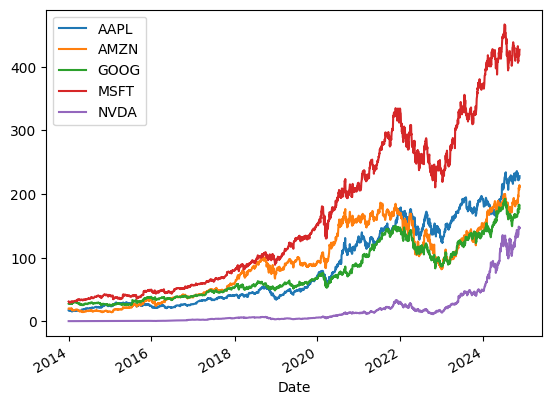

In [38]:
data.plot()

There are many options to customize the plot, e.g. using a logarithmic scale for the y-axis.

<AxesSubplot: xlabel='Date'>

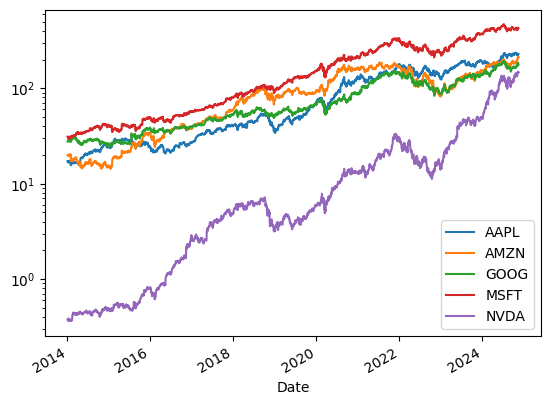

In [39]:
data.plot(logy=True)

To get histograms of the data, you can use the `hist()` method.

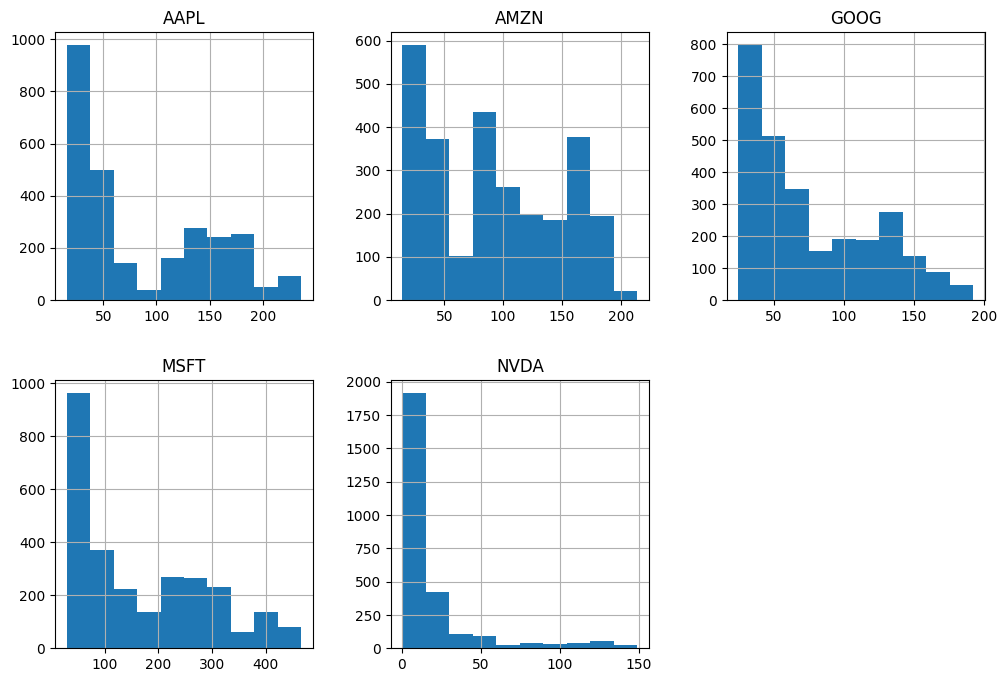

In [40]:
_ = data.hist(layout=(2,3), figsize=(12,8))

You can compute correlations and covariances with the `corr()` and `cov()` methods.

In [41]:
data.corr()

,AAPL,AMZN,GOOG,MSFT,NVDA
AAPL,1.000000,0.882058,0.967977,0.983031,0.793758
AMZN,0.882058,1.000000,0.916883,0.910593,0.674337
GOOG,0.967977,0.916883,1.000000,0.982322,0.812040
MSFT,0.983031,0.910593,0.982322,1.000000,0.828931
NVDA,0.793758,0.674337,0.812040,0.828931,1.000000


In [42]:
data.cov()

,AAPL,AMZN,GOOG,MSFT,NVDA
AAPL,4151.145647,3174.521833,2747.128162,7795.624172,1474.322961
AMZN,3174.521833,3120.287328,2256.011172,6260.679899,1085.911739
GOOG,2747.128162,2256.011172,1940.260297,5325.787815,1031.164191
MSFT,7795.624172,6260.679899,5325.787815,15149.547003,2941.297211
NVDA,1474.322961,1085.911739,1031.164191,2941.297211,831.076343


You can show these matrices in different ways. For instance:


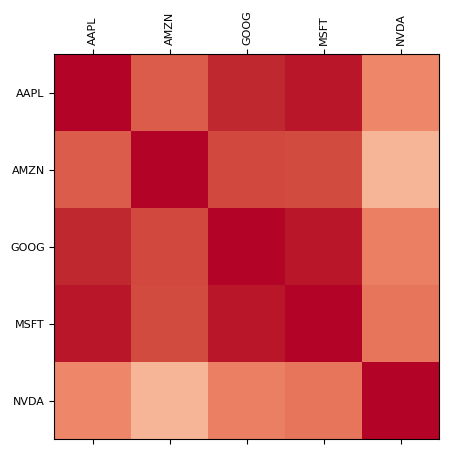

In [43]:
import matplotlib.cm as cm
corr = data.corr()
size = 5
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8);


We will not cover scikit-learn and seaborn in details here, but you can find many examples of their use in the [sklearn documentation](https://scikit-learn.org/stable/documentation.html), [sklearn gallery](https://scikit-learn.org/stable/auto_examples/index.html), and [seaborn documentation](https://seaborn.pydata.org/) and [seaborn gallery](https://seaborn.pydata.org/examples/index.html).

Know that they exist, that scikit-learn is for basic machine learning tasks, and seaborn is for high-level statistical plotting, for instance to make [violin plots](https://seaborn.pydata.org/examples/grouped_violinplots.html) or fancy [cluster maps](https://seaborn.pydata.org/examples/structured_heatmap.html).


Regarding `matplotlib`, we have already seen many examples of its use and you can find many more in the [gallery](https://matplotlib.org/stable/gallery/index.html).

Plotting is very important for you as data scientists. 

